# Movement under nonuniform, constant electromagnetic fields

# Abstract

In this notebook we study the effect of nonuniformities of the magnetic and electric fields on the individual movement of charged particles. We show that, in first order of expansion, the ***magnetic moment*** is a constant of motion. We discuss the principles of ***magnetic mirrors*** and the movement of charged particles in Nature.

# Contents

1. [Background](#1)
2. [Type of nonuniformities for the magnetic field](#2)
    1. [$\nabla{B} \perp \vec{B}$: Grad B drift](#3)
    2. [Curvature drift](#4)
    3. [Total drift](#5)
    4. [Gradient along $B$](#6)
3. [Magnetic moment](#7)
    1. [Magnetic mirrors](#8)
4. [Nonuniform $\vec{E}$ field](#9)

# References

The subject of this notebook is covered in the bibliography in the following chapters:

>* F. Chen<cite data-cite="chen1974"></cite>: *Single-particle Motions*, chapter 2, section 2.3
>* D. Nicholson<cite data-cite="nicholson1983"></cite>: *Single-particle Motion*, chapter 2, section 2.3, 2.4 and 2.6
>* J. Bittencourt<cite data-cite="Bittencourt2004"></cite>: *Charged particle motion in constant and uniform electromagnetic fields*, chapter 3
>* R. Goldston<cite data-cite="Goldston1995"></cite>: *Single-particle motion*, chapter 3

The examples are prepared with the help of two scientific software packages, *Scipy*<cite data-cite="jones2001"></cite> and *IPython*<cite data-cite="PER-GRA:2007"></cite>, and a plotting library *Matplotlib*.

# 1. Background

In this notebook we will need two of the Maxwell equations in vacuum (in SI units):

\begin{align}
\nabla\times\vec{B}-\frac{1}{c^2}\frac{\partial\vec{E}}{\partial t} &= \mu_0\vec{j} \tag{Ampere's law}\\
\nabla\cdot\vec{B} &= 0  \tag{Gauss's law for magnetism}
\end{align}
and, off course, the force equation,
$$ \vec{F} = q\left(\vec{E}+\vec{v}\times\vec{B}\right) \tag{Lorentz force}$$

We will use the Gauss theorem,

$$ \int_V \nabla\cdot\vec{A}\;dV = \oint_S \vec{A}\cdot\vec{n}\;dS, $$

It is also convenient to recall how the divergence of a vector is written in cylindrical coordinates:

$$ \nabla\cdot\vec{A} = \frac{1}{r}\frac{\partial}{\partial r}(rA_r)+\frac{\partial A_\theta}{r\partial\theta}+\frac{\partial A_z}{\partial z} $$

Finally we return to the concept of magnetic moment, $\mu$, which, for a closed loop of area $A$ and current $I$, has the value $\mu = IA$.

# 2. Type of nonuniformities for the magnetic field

We start by studying four types of space changes in $\vec{B}$:
<table style="width:90%">
<caption>Types of nonuniform magnetic field</caption>
  <tr>
    <td><img src="images/gradB.png" style="width:200px;height:162px"/>Grad B</td>
    <td><img src="images/curvB.png" style="width:200px;height:162px"/>Curvature</td>
    <td><img src="images/curvgradB.png" style="width:200px;height:162px"/>Grad B and curvature</td>
    <td><img src="images/divB.png" style="width:200px;height:162px"/>Divergence B</td>
  </tr>
  <tr>
  <td>1) $\partial B_z/\partial x,\,\partial B_z/\partial y$</td>
  <td>2) $\partial B_x/\partial z,\,\partial B_y/\partial z$</td>
  <td>1)+2)</td>
  <td>3) $\partial B_x/\partial x,\,\partial B_y/\partial y,\,\partial B_z/\partial z$</td>
  </tr>
</table>

# 2.1 $\nabla{B} \perp \vec{B}$: Grad B drift

The magnetic field lines are straight but their density changes in the plane $\perp$ to $\vec{B}$.

$$ \vec{B} = \vec{B}_0 + \vec{r}\cdot\nabla\vec{B} + \cdots $$

To simplify, we consider that $\vec{B}$ varies only with *y*:
$$ \vec{B}(y) = \left(B_{gc,0} + (y-y_{gc})\frac{d B}{d y}\right)\vec{u}_z $$

*Note*: according to Maxwell equations, as $\nabla\times\vec{B} \ne \vec{0}$, to have this field we need distributed volume currents...

**Important**: $\color{blue}{Assumption:} r_L \ll B/|\nabla B|$

## What happens? How is the movement?

$\color{red}{Class\,discussion...}$

$\color{red}{...}$

We start from the Lorentz equation without electric field, $\vec{F}=q\vec{v}\times\vec{B}$. 

If we average on the gyroperiods, the $x$ average component is zero, $\overline{F_x}=0$. For the y component, we have $F_y= - q v_x B_z(y)$. using the results of the previous notebook for $v_x$ and $y-y_0$:
$$ F_y = -q v_\perp \cos(\omega_c t)\left[B_{gc,0}\pm r_L\cos(\omega_c t)\frac{\partial B}{\partial y}\right] $$
Averaging in a gyroperiod we obtain
$$ \overline{F_y} = \mp\frac{1}{2}qv_\perp r_L\frac{\partial B}{\partial y} $$
(*Note*: $\overline{\cos^2(\omega_ct)} = 1/2$).

This force is responsible for a drift of the guiding center. Using the result, $ \vec{v}_{d} = \vec{F}\times\vec{B}/(q B^2)$, from the previous notebook for the value of this drift we write

$$ \vec{v}_{grad} = \mp \frac{1}{2}\frac{v_\perp r_L}{B}\frac{\partial B}{\partial y}\vec{u}_x $$

Finally, generalizing for a gradient $\nabla{B} \perp \vec{B}$, we reach at the result

$$ v_{\nabla B} = \pm \frac{1}{2}v_\perp r_L\frac{\vec{B}\times\nabla{B}}{B^2} $$

---

## Practice:

Let's see how important is the assumption $r_L \ll B/|\nabla B|$. 

We can generalize and consider $B_z$ gradients both along $y$ and $x$, compute the trajectories for arbitrary values of ${\partial B}/{\partial x}$ and ${\partial B}/{\partial y}$ and see what happens...

In [4]:
%matplotlib inline
from ipywidgets import interact
from scripts.trajectories import *

def gradB(Q, t, qbym, E0, B0, keywords):
    """Equations of movement for a grad-B magnetic field.
    
    Positional arguments:
    Q -- 6-dimension array with (x,y,z) values of position and velocity on t-dt
    t -- next time (not used here but passed by odeint)
    qbym -- q/m
    E0, B0 -- arrays with electric and magnetic field values
    Keyword arguments:
    dBdx, dBdy -- The gradient values in x and y, respectively.
    
    Return value:
    Array with dr/dt and dv/dt values.
    
    Note: The condition rL/(grad(B)/B) == coeficients of Q[:1] << 1 should be obeyed.
    """

    gradx, grady = "grad" in keywords.keys() and keywords["grad"] or [0, 0]
    x, y = Q[:2]
    B = B0*np.array([1,1,1 + x*gradx + y*grady])
    
    v = Q[3:]                                 # Velocity
    dvdt = qbym*np.cross(v,B)                 # Acceleration
    return np.concatenate((v,dvdt))

dummy = interact(gradBdrift, gradx=(-2.5,2.5), grady=(-2.5,2.5))

interactive(children=(FloatSlider(value=0.0, description='gradx', max=2.5, min=-2.5), FloatSlider(value=0.1, d…

In [2]:
def gradBdrift(gradx=0.0, grady=0.1):
    """Movement under a grad B perpendicular to B"""
    re, rp = computeTrajectories(gradB, grad=[gradx/10,grady/10]) # NOTE the /10 !
    plotGradB(re,rp,gradx,grady)

Let's start with just a y-gradient:

In [5]:
#gradBdrift(gradx=0.0, grady=0.1)

* Electrons and positive ions drift in oposite directions $\Rightarrow$ **net current**!

Now,let's include also a x-gradient:

In [6]:
#gradBdrift(gradx=0.2, grady=0.1)

Now let's test the limits of our approximation!

In [7]:
#gradBdrift(gradx=0.0, grady=0.6)

In [8]:
#gradBdrift(gradx=-0.1, grady=0.6)

# 2.2 Curvature drift

$\color{blue}{Assumption:}$ B field lines locally curved (but constant) with radius of curvature $\vec{R}_c$.

Achieved also with volume currents.

Centrifugal force in the radial direction:
$$ \vec{F}_{cf} = \frac{mv_\parallel^2}{R_c}\vec{u}_r = mv_\parallel^2\frac{\vec{R}_c}{R_c^2} $$
and using the equation above for a generic force:
$$ \vec{v}_{curv} = \frac{mv_\parallel^2}{q B^2}\frac{\vec{R}_c\times\vec{B}}{R_c^2}$$

In "vacuum fields" (without volume currents) B must fall in the perpendicular direction as $|B|\propto 1/R_c$ and $\nabla|B|/B= -\vec{R}_c/R_c^2$. Thus,

$$ \vec{v}_{curv} = \pm \frac{v_\parallel^2}{\omega_c}\frac{\vec{B}\times\nabla B}{B^2} $$

# 2.3 Total drift

* The curvature and grad drift add;
* In opposite directions for charges of opposite signs;
* Proportional to the particle energy.
$$ \vec{v}_d = \left( \frac{1}{2}mv_\perp^2 + mv_\parallel^2 \right)\frac{1}{qB^2}\frac{\vec{R}_c\times\vec{B}}{R_c^2}$$
* For a Maxwellian isotropic distribution both terms give the same contribution.

# 2.4 Gradient along $B$

Let us analyse the case where the magnetic field increases along his direction, i.e. when for $\vec{B}=B_z\vec{u}_z$, we have $\partial B_z / \partial z > 0$.

> Let's recall that, in cylindrical coordinates, the divergence of a vector is
> $$ \nabla\cdot\vec{A} = \frac{1}{r}\frac{\partial}{\partial r}(rA_r)+\frac{\partial A_\theta}{r\partial\theta}+\frac{\partial A_z}{\partial z} $$

As Maxwell laws impose $\nabla\cdot\vec{B}=0$, (assuming, to simplify, that $B_\theta = 0$) then

$$ \frac{\partial B_z}{\partial z} > 0 \Rightarrow \frac{1}{r}\frac{\partial}{\partial r}(rB_r)< 0. $$

Assuming again that $r_L \ll B/|\nabla B|$, we can compute an *average* value for $\overline{B_r}$. Taking a small cylindrical volume centered along a magnetic field line, the net flux out of this volume has to be zero.

Using the Gauss law on the surface of this volume, we can write 

$$\pi(\delta r)^2\delta l(d B/d z)+2\pi\delta r\delta l\overline{B_r}=0$$
and

$$ \overline{B_r} = - \frac{\delta r}{2}\frac{d B}{d z}. $$

Now, if $\delta r$ is the Larmor radius, it is this field that intervenes in the Lorentz force. Taking the time average over the gyro-period, we obtain

$$ \overline{F_\parallel} = - \frac{|q|v_\perp^2}{2\omega_c}\frac{d B}{d z} = -\frac{W_\perp}{B}\frac{d B}{d z}. \tag{*}$$

* Force in the direction opposite to the field gradient for **both** positive and negative charges.

## 3. Magnetic moment

In the previous notebook we have introduced the magnetic moment for the gyrating particle:

$$ \mu = \frac{|q|v_\perp^2}{2\omega_c} = \frac{m v_\perp^2}{2 B} = \frac{W_\perp}{B}. $$

Now, it is time to see the importance of $\mu$. Let's look at the conservation laws for this case:

* Angular momentum: As the force $\overline{F_\parallel}$ is constant, the angular momemtum, $\vec{L} = m\vec{r}_L\times\vec{v}$ is constant. Note that $\vec{L} = m r_L v_\perp\vec{u}_\parallel$;
* Kinetic energy: In the presence of a static magnetic field, the total kinetic energy must be conserved.

Both laws imply that the $\mu$ is a constant of motion as we will show:

* Conservation of the angular momentum: 
$$\vec{L} = m r_L v_\perp\vec{u}_\parallel = m \frac{v_\perp^2}{\omega_c}\vec{u}_\parallel \equiv (2m/|q|)\vec{\mu}\,$$
as $\,d\vec{L}/dt = 0 \Rightarrow \vec{\mu}$ is constant;

* Conservation of the kinetic energy: We start by writing
$$ m\frac{dv_\parallel}{dt} = -\mu\frac{dB}{ds},$$

where we have parameterized the distance along the field line, $s$. Multiplying both sides of this equation by $v_\parallel=ds/dt$ we obtain
$$ \frac{d}{dt}\left(\frac{m v_\parallel^2}{2}\right) = -\mu\frac{dB}{dt}.$$

For the total kinetic energy, we write
$$ \frac{d}{dt}\left(\frac{mv_\parallel^2}{2}+\frac{mv_\perp^2}{2}\right) = \frac{d}{dt}\left(\frac{mv_\parallel^2}{2}+\mu B\right) = 0 $$
Using the above result we have
$$ -\mu\frac{dB}{dt}+\frac{d}{dt}(\mu B) = 0 \Rightarrow \frac{d\mu}{dt} = 0. $$

* $\mu$ is an invariant!
* $v_\perp$ has to increase when the particle moves to higher $B$ regions;
* $v_\parallel$ decreases as $v_\perp$ increases.

## 3.1 Magnetic mirrors

This effect is used to confine plasmas. Let's supose that we have the a magnetic field with the following configuration of field lines:
<img src="images/MagnMirror.png" style="width:500px;height:456px"/>

The parallel velocity of a particle with kinetic energy $W$ and magnetic moment $\mu$ has to obey the equation (as $W_\perp = \mu B$)
$$ \frac{mv_\parallel^2}{2} = W - \mu B(z) $$
and will have a reflection point (i.e. where $v_\parallel = 0$) at $z_{max}:\,B(z_{max}) = B_{max}= W/\mu$.

**Are all particles trapped?**

Let as consider a particle moving around a field line with a minimum value, $B_{min}$, in the midplane, $mp$, and $B_{max}$ at the mirror throat. The limiting conditions to trap particles are (using the result above):
\begin{align}
\left.W_\perp\right|_{mp} &= \mu B_{min} = W B_{min}/B_{max} \\
\left.W_\parallel\right|_{mp} &= W(1 - B_{min}/B_{max})
\end{align}
Particles with higher value of $\left.W_\parallel\right|_{mp}/W$ can escape the trap! This condition defines a 'loss cone'.
<img src="images/loss_cone.png" style="width:400px;height:150px"/>

* Exercise: Show that the equation for the 'loss cone' is 
$$\frac{|v_\parallel|}{|v_\perp|} = \left(\frac{B_{max}}{B_{min}}-1\right)^{1/2} $$

and that this defines a critical angle.

---

## Practice:

**Note:** The following code is still under development!

In [9]:
#%matplotlib qt4
%matplotlib inline
from scripts.trajectories import *

def divB(Q, t, qbym, E0, B0, keywords):
    """Equations of movement for a dBz/dz gradient"""
    global eMu, pMu, zMax

    gamma = "gm" in keywords.keys() and keywords["gm"] or 0
    z = Q[2]; v = Q[3:]                 # Position and velocity
    vperp = np.sqrt(v[0]**2+v[1]**2)    # Perpendicular|B velocity
    if np.abs(z) <= zMax:
        Bz = B0[2]*(1+gamma*z**2) #*np.abs(qbym)
        omega_c = qbym*Bz               # Cyclotron frequency (we keep the signal for the direction of rotation)
        rL = vperp/np.abs(omega_c)      # Larmor radius
        Br = -rL*B0[2]*gamma*np.abs(z)
        theta = omega_c*t
        B = np.array([Br*np.cos(theta),-Br*np.sin(theta),Bz])
        dvdt = qbym*np.cross(v,B)       # Acceleration
        if np.sign(qbym) == -1:
            #dvdt[2] = mue/qbym*2*B0[2]*gamma*z
            dvdt[2] = - eMu*2*B0[2]*gamma*z
        else:
            #dvdt[2] = - mup/qbym*2*B0[2]*gamma*z
            dvdt[2] = - pMu*2*B0[2]*gamma*z
    else:
        dvdt = np.zeros(3)
    return np.concatenate((v,dvdt))

def mirrorB(Bratio=1.9, escape=0.93, gamma=1e-4):
    """Movement with a grad B parallel to B
    
    Parameters
    ----------
    Bratio: float - Bmax/Bmin ratio
    escape: float - factor for the ratio between v_parallel and v_perpendicular
                    (if escape >= 1 the particle escape)
    gamma: float  - 
    """
    global eMu, pMu, zMax
    # Initial values
    if escape == 0:
        vperp0 = 1; vpar0 = 0
    else:
        vratio = np.sqrt(Bratio-1)*escape
        vpar0 = 1; vperp0 = vpar0/vratio
        
    # Initial values:
    rLe0 = vperp0/(q/me*B0[2])          # e-Larmor radius
    rLp0 = rLe0*Mp/me                   # p-Larmor radius
    re0 = np.array([rLe0,0,0])          # e-Position
    rp0 = np.array([-rLp0,0,0])         # p-Position
    v0 = np.array([0,vperp0,vpar0])     # Velocity
    eWperp0 = me*vperp0**2/2            # Perpendicular kinetic energy
    eW = eWperp0 + me/2*vpar0**2        # e-Kinetic energy
    pW = eW*Mp/me                       # p-Kinetic energy
    
    eMu = eWperp0/B0[2]; pMu = eMu*Mp/me   # Magnetic moment
    BMax = Bratio*B0[2]                    # Max. magnetic field
    Bconf = eW/eMu                      # Mag. field for v|| = 0
    zMax = np.sqrt((Bratio-1)/gamma)
    
    re, rp = computeTrajectories(divB, ri=[re0,rp0], vi=v0, gm=gamma)

    plotMirror(re0,rp0,re,rp,zMax)

    print('Magn. moment  Kinetic energy B_Max   B_conf \
zM_conf\n eMu = {:.3f}    We = {:.3f}   {:.3f}   {:.3f} \
 {:.3f}'.format(eMu,eW,BMax,Bconf,zMax))
    print(' pMu = {:.3f}    Wp = {:.3f}'.format(pMu,pW))
    

Magn. moment  Kinetic energy B_Max   B_conf zM_conf
 eMu = 0.567    We = 1.067   1.900   1.882  94.868
 pMu = 5.668    Wp = 10.668


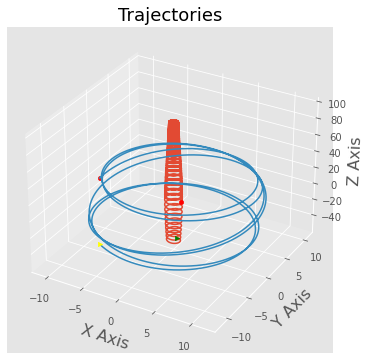

In [10]:
mirrorB(escape=0.99)

Magn. moment  Kinetic energy B_Max   B_conf zM_conf
 eMu = 0.545    We = 1.045   1.900   1.918  94.868
 pMu = 5.446    Wp = 10.446


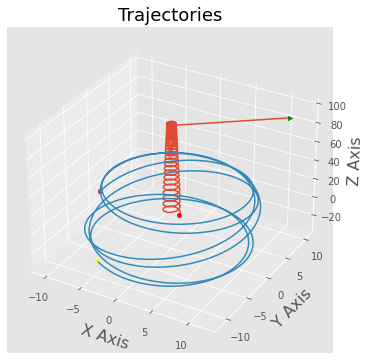

In [10]:
mirrorB(escape=1.01)

## Applications

### In plasma machines

<table>
<tr>
<td><img src="images/MagMirMach1.png" style="width:250px;height:228px"/></td>
<td><img src="images/MagMirMach2.png" style="width:250px;height:228px"/></td>
</tr>
</table>

### In Nature

<img src="images/MagMirNature4.png" style="width:450px;height:256px"/>
1 - Cyclotronic motion; 2 - Mirror effect; 3 - Curvature drift.

<table>
<tr>
<td><img src="images/MagMirNature1.png" style="width:250px;height:228px"/></td>
<td><img src="images/MagMirNature2.png" style="width:250px;height:228px"/></td>
</tr>
</table>

New effect discovered in September 2012! - the Van Allen belts:

<img src="images/MagMirNature3.png" style="width:500px;height:300px"/>

# 4. Nonuniform $\vec{E}$ field

To finish this notebook we still have to look at the case of a nonuniform electric field. So simplify let us assume a sinusoidal variation in the $x$ direction:

$$ \vec{E} = E_0 \cos(kx)\vec{u}_x, $$

and we take $k$ such that the wavelength $\lambda=2\pi/k$ is large comparing with $r_L$.

From the Lorentz force equation we have

\begin{align}
\dot{v}_x &= \frac{q B}{m}v_y + \frac{q}{m}E_x(x)  \\
\dot{v}_y &= -\frac{q B}{m}v_x \\
\end{align}

and, we focus our attention in the equation for ${v}_y$. Differentiating these equations we obtain:

\begin{align}
\ddot{v}_x &= -\omega_c^2 v_x \pm \omega_c\frac{\dot{E}_x(x)}{B} \tag{*} \\
\ddot{v}_y &= -\omega_c^2 v_y - \omega_c^2 \frac{E_x(x)}{B}. \tag{**}
\end{align}

To solve this we need to know the field at $x$ but this depends on the orbit equation that we are trying to obtain... That is when our approximation is needed: If the field is weak, we use the *undisturbed orbit*, $x = x_0 + r_L\sin \omega_c t$.
Substituting this in equation (**) we have

$$ \ddot{v}_y = -\omega_c^2 v_y - \omega_c^2 \frac{E_0}{B}\cos[k(x_0 + r_L\sin \omega_c t)] $$

As before, we expect to have a drift, $v_E$, superimposed to a gyration movement. As we have done before, to find $v_E$ we average on the gyroperiods to obtain $\overline{\ddot{v}}_{x,y} = 0$. As this implies $\overline{v}_x = 0$ (*Question*: why?) we only have a drift along $y$. 

To reach to a value for $v_E$ we need to average the $\overline{\cos[k(x_0 + r_L\sin \omega_c t)]}$ term. After expanding the cosine, we need again our assumption, $k r_L \ll 1$ to use a Taylor expansion. After some mathematics we obtain

$$ \cos[k(x_0 + r_L\sin \omega_c t)] \approx \cos(k x_0)(1-\frac{1}{2}k^2r_L^2\sin^2(\omega_c t)) -
\sin(k x_0)k r_L \sin(\omega_c t) $$

Averaging over time, gives

$$ \overline{v}_y = - \frac{E_x(x_0)}{B}\left(1-\frac{1}{4}k^2r_L^2\right), $$

where we have put $E_0\cos(kx_0)=E_x(x_0)$.

Generalizing for variations in arbitrary directions, we obtain the drift with the correction in vector form,

$$ \vec{v}_E = \frac{\vec{E}\times\vec{B}}{B^2}\left(1-\frac{1}{4}k^2r_L^2\right). $$

This result introduces a correction from the inhomogeneity on our previous result for the $\vec{E}\times\vec{B}$ drift. 

**Electrons and ions have different Larmor radius** $\Rightarrow$ charge separation $\Rightarrow$ possibility of plasma instabilities (*drift instability*).